In [1]:
#this is the new file

<b><font color ='red'><h4> Evaluation metrics overview </h4></font></b>


In this we will look at if 80% is good or not and other metrics that help in gauging a more information about the classification models and their accuracies


In [2]:
#lets import the code from previous part that will help us to achieve the learnings for this module

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

Categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in Categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
    
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn=(df.churn=='yes').astype(int)


In [5]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.churn.values
y_val= df_val.churn.values
y_test=df_test.churn.values


del df_train['churn']
del df_val['churn']
del df_test['churn']


In [6]:
numerical=['tenure','monthlycharges','totalcharges']
categorical= [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(df_train[categorical+numerical].to_dict(orient='records'))

model = LogisticRegression()
model.fit(X_train,y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
X_val=dv.transform(df_val[categorical+numerical].to_dict(orient='records'))  # do not do fit transform again as we have already fitted the dict vectorizer so the number and columns are defined we just need to now transfrom the data as per the column information that we have

y_pred=model.predict_proba(X_val)[:,1]
churn_decision=(y_pred>=0.5)
(y_val==churn_decision).mean()

np.float64(0.8026969481902059)

In [9]:
# we have imported the code from the previous chapter now we can bulid the code for this chapter over and above this one.
len(y_val)

1409

<b><font color ='red'><h4> Accuracy and Dummy Model </h4></font></b>

😶Evaluate the model on different thresholds
😶Check the accuracy of dummy baselines

In [10]:
# lets take a look for how many customers did our model predict correctly
(y_val==churn_decision).sum()

#Hence we calculated the correct results for 1131 customers out of 1409 that is 80% accuracy 
#Accuracy tells us about the fraction of the correct prediction

np.int64(1131)

In [11]:
# now instead of 0.5 lets try to move the threshold and see how that impacts out model accuracy

thresholds=np.linspace(0,1,21)

score=[]

for t in thresholds:
    churn_decision=(y_pred>=t)
    acc=(y_val==churn_decision).mean()
    print('%.2f %.3f' % (t,acc))  # this means that only two decimal visible for t and 3 decimal for acc
    score.append(acc)

0.00 0.274
0.05 0.508
0.10 0.591
0.15 0.666
0.20 0.709
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.792
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


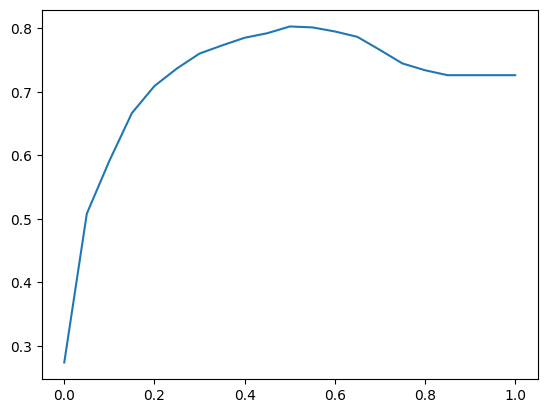

In [12]:
plt.plot(thresholds,score)


In [13]:
# Turns out that for this problme indeed 0.5 is the best threshold

In [14]:
# here we have implemented our own function to calculate the accuracy that is the line where we are calcualtin the mean but we do not have to do that since sklearn provides the accuracy score 

from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_val,churn_decision)

# Here it is using the churn decision from the last itetration

0.7260468417317246

In [16]:
# but we can do it this way to see the accuracy score
accuracy_score(y_val,y_pred>=0.5)

0.8026969481902059

In [17]:
# Now we need to see what is happening when the t is 1 since the values can not be greater that 1 hence there the values are 72%
y_pred>=1

# each element is false

array([False, False, False, ..., False, False, False])

In [18]:
accuracy_score(y_val,y_pred==1)

#this means that if we take the threshold as 1 still the model gives an accuracy of 72% then why do we even need to bother with this model. as in if we assume that everybodu is not churning then still we will get 72% accuracy
#our model is just making it 7% accurate.
# and this is the reason that accuracy is not the correct indicator.


0.7260468417317246

to count the values (in this case how many are true and how many are false) we can import counter from collection since this is a special collection.

In [19]:
from collections import Counter

In [20]:
Counter(y_pred>=1) # gives us the only the false values are there and that is 1409 

#so if we take the threshold more than 1 then our model is saying to us that relax nobody is going to churn.

Counter({np.False_: 1409})

In [21]:
#the reason that this is happening that the accuracy is 72% is lets take a look at our target variable.

y_val.mean()

# this means that 27% are churning. ie. these are the ones that have value in the target varibale as 1

np.float64(0.2739531582682754)

In [22]:
1-y_val.mean()

# this is the axact value that we are getting. so if we predict that nobody is churning still the accuracy will be 72% and the model can say for the rest 27% that churn that oops I made a mistake.

np.float64(0.7260468417317246)

In our case since there are 72% people that are not churning and 27% are churning hence this causing what is called

<font color ='red'> Class Imbalance </font>

Hence in such cases the accuracy will anyhow always be good. Hence the accuracy score in case of class Imbalace is misleading




<b><font color ='red'><h4> Confusion Table</h4></font></b>
😶Different types of erroes and correct decision <br>
😶Arranging them in table

In [23]:
#Now lets implement this in numpy
t=0.5
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

true_positive = (predict_positive & actual_positive).sum() # here instead of ==, & operator will be used since the arrays are true and false hence we can only use the bitwise operator
true_negaive = (predict_negative & actual_negative).sum()

false_positive = (predict_positive & actual_negative).sum()
false_negtive = (predict_negative & actual_positive).sum()

print("t has the value of :",t,true_positive,true_negaive,false_positive,false_negtive)


t has the value of : 0.5 210 921 102 176


This is how we put these values in the confusion matrix <br>

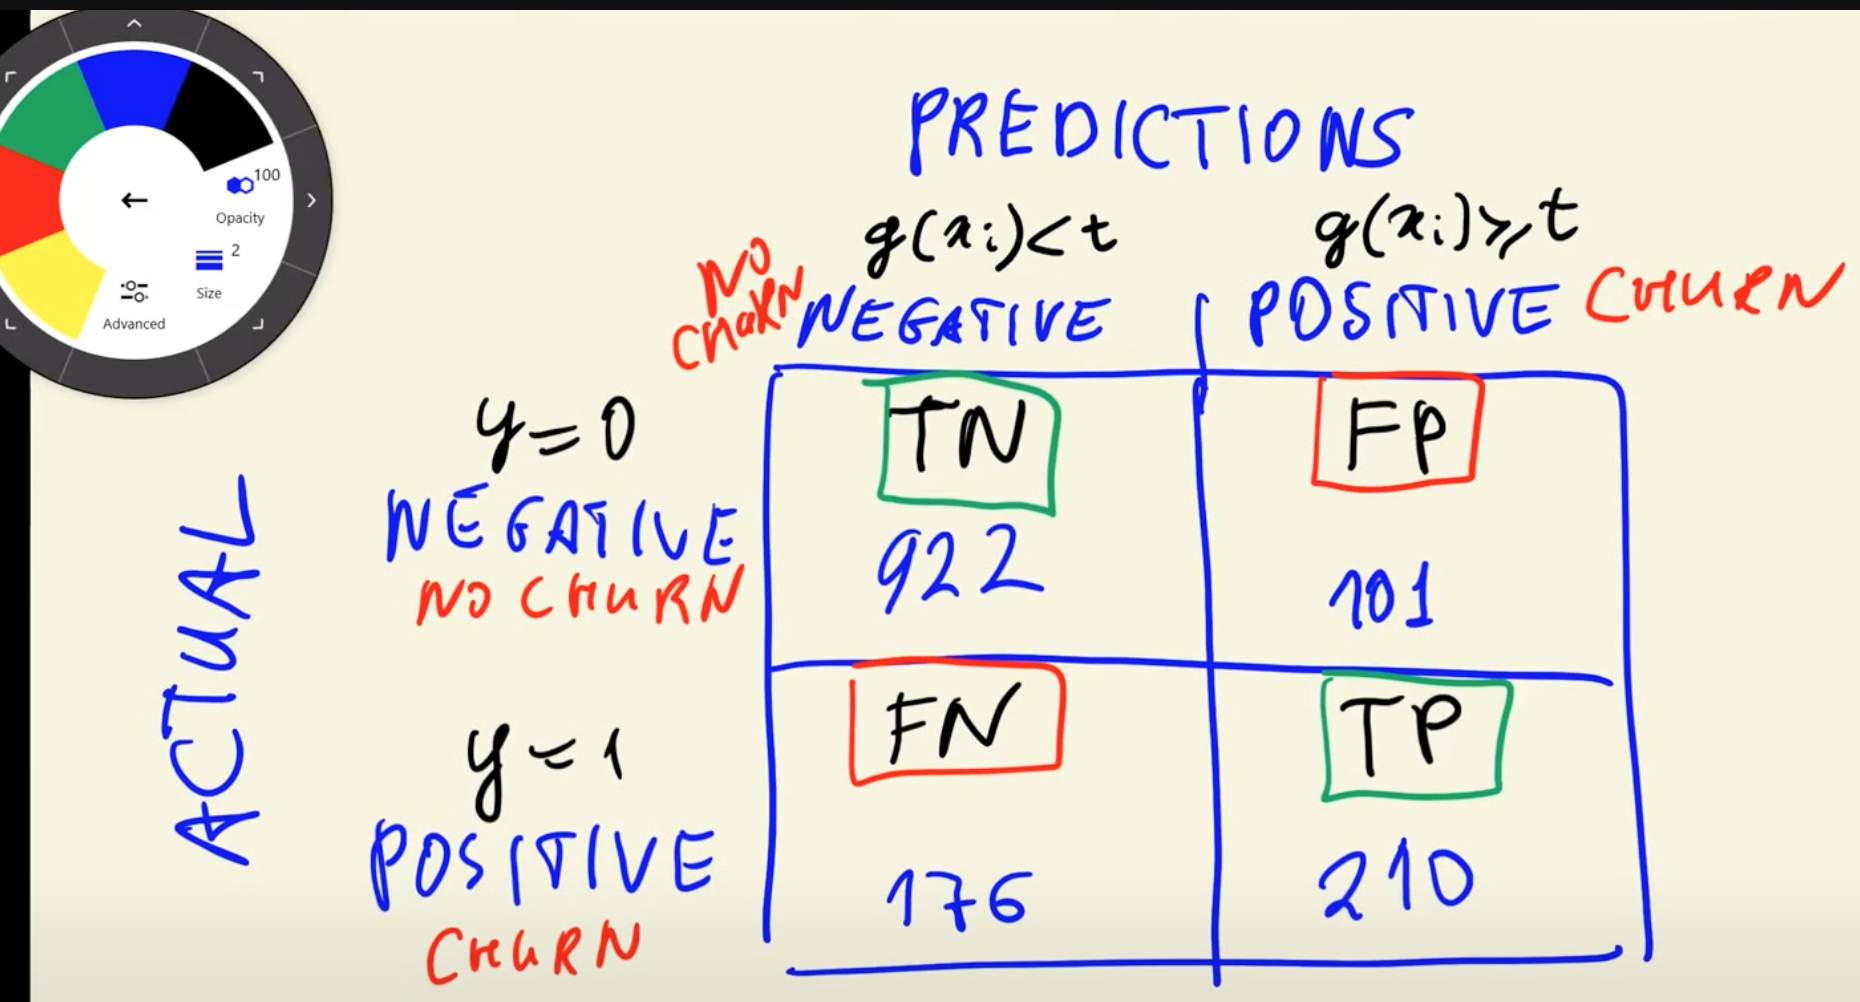

In [30]:
confusion_matrix = np.array([
    [true_negaive,false_positive],
    [false_negtive,true_positive]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

Here we see that the false negative are more than false positive.<br>
The false positive are the people that are not going to churn but will still get the promotional email.<br>
The false Negative are the people that are going to churn but we predicted they are not goin to churn hence we were not able to retain them hence loss of profits.<br>

Hence we that there are two types of error and the the false negative are more harder to catch compared to false positive.

<br>we can also normalize them i.e in terms of percentage




In [32]:
(confusion_matrix/confusion_matrix.sum()).round(2) #due to rounding the sum is not comig up to be 100 of all the 4 elements

array([[0.65, 0.07],
       [0.12, 0.15]])